# Explanatory Analysis: Predicting Smoking Status

**Dataset**: `your_data.csv` (159,256 rows, 12 features + `smoking`), generated using `generate_data.py` with ids

# Explanatory Analysis: Predicting Smoking Status

This notebook summarizes our machine learning pipeline to predict smoking status using bio-signals

**Dataset**: `your_data.csv` (159,256 rows, 12 features + `smoking`), generated using `generate_data.py` with team IDs 8177, 8179, 8120. Features include `hearing(left)`, `relaxation`, `hemoglobin`, `Gtp`, `LDL`, `serum creatinine`, `Urine protein`, `fasting blood sugar`, `age`, `waist(cm)`, `triglyceride`, `smoking`.

**Steps**:
1. Dataset Preparation: Split into train (80%), validation (10%), test (10%).
2. Data Analysis: Univariate, bivariate, multivariate analyses on all 12 features.
3. Feature Engineering: Transformations and feature selection.
4. Ensemble Methods: Bagging, boosting, Random Forest
5. Hyperparameter Tuning and Final System: Best model performance

The assignment pdf required to include only crucial graphs in this notebook 

### Univariate Analysis

We analyzed all 12 features in the training set to understand their distributions, focusing on features that inform feature engineering and modeling.

**Crucial Graphs**:
1. **Histogram of `hemoglobin`**:  
   - *Why Crucial*: `hemoglobin` has the strongest correlation with `smoking` (0.45) among all features. Its near-normal distribution (mean ~14.8, range 5–20) helps assess its suitability as a predictor and identify potential outliers for preprocessing.

2. **Count plot of `hearing(left)`**:  
   - *Why Crucial*: `hearing(left)` is a categorical feature with significant imbalance (~2% impaired). This informs the need for one-hot encoding and highlights potential class imbalance issues in modeling.

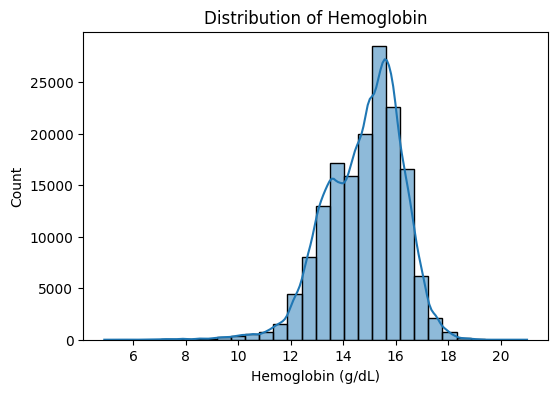

Hearing(left) Value Counts:
hearing(left)
1    155438
2      3818
Name: count, dtype: int64


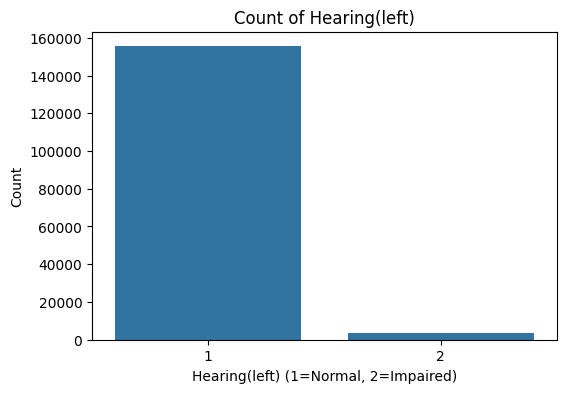

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data_path=r"your_data.csv"
df = pd.read_csv(data_path)
# Histogram of hemoglobin
plt.figure(figsize=(6, 4))
sns.histplot(df['hemoglobin'], bins=30, kde=True)
plt.title('Distribution of Hemoglobin')
plt.xlabel('Hemoglobin (g/dL)')
plt.ylabel('Count')
plt.show()

# Count plot of hearing(left)
plt.figure(figsize=(6, 4))
sns.countplot(x=df['hearing(left)'])
plt.title('Count of Hearing(left)')
plt.xlabel('Hearing(left) (1=Normal, 2=Impaired)')
plt.ylabel('Count')
print("Hearing(left) Value Counts:")
print(df['hearing(left)'].value_counts())
plt.show()

### Bivariate Analysis

We explored relationships between features and `smoking` to identify predictive patterns.

**Crucial Graph**:
- **Boxplot of `hemoglobin` vs. `smoking`**:  
  - *Why Crucial*: This plot highlights the strongest predictive relationship in the dataset (`hemoglobin` vs. `smoking`, correlation 0.45). Smokers show significantly higher hemoglobin levels, making it a key feature for modeling.

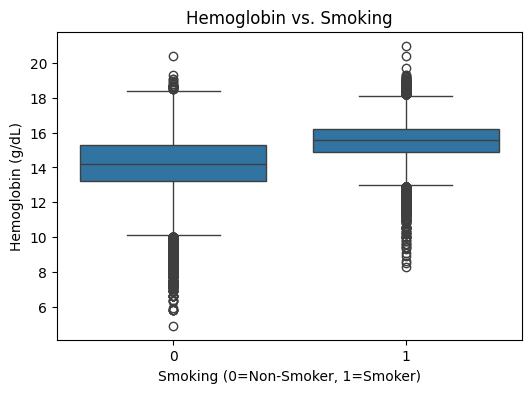

In [ ]:

train_df = df.copy()
train_df['smoking'] = df['smoking']

plt.figure(figsize=(6, 4))
sns.boxplot(x='smoking', y='hemoglobin', data=train_df)
plt.title('Hemoglobin vs. Smoking')
plt.xlabel('Smoking (0=Non-Smoker, 1=Smoker)')
plt.ylabel('Hemoglobin (g/dL)')
plt.show()

### Multivariate Analysis

We examined interactions among features to understand combined effects and inform feature selection.

**Crucial Graph**:
- **Correlation heatmap**:  
  - *Why Crucial*: This heatmap summarizes key feature interactions (e.g., `hemoglobin`-`waist(cm)` 0.42, `smoking`-`hemoglobin` 0.45). It helps identify correlated features for potential dimensionality reduction and highlights multi-feature relationships affecting `smoking`.

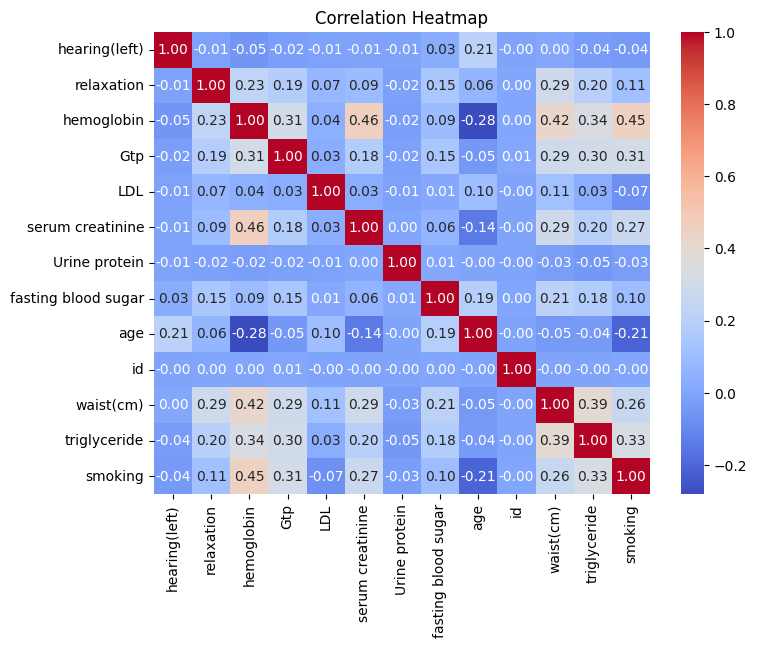

In [ ]:

plt.figure(figsize=(8, 6))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Using data analysis insights, we:
- Removed invalid values (e.g., `hemoglobin` constrained to 5–20 g/dL).
- Created features: binary flags (e.g., `high_hemoglobin`), interactions (e.g., `gtp_waist`), binned features (e.g., `waist_bin`), and a composite `smoking_risk_score`.
- Selected top features using correlation, ANOVA F-scores, and Random Forest importances.
- Saved processed data as `newdataframe.csv`.

**Note**: Outlier removal (IQR) and normalization are pending.

**Crucial Graph**:
- **Random Forest feature importances**:  
  - *Why Crucial*: This plot shows the top features post-engineering (e.g., `smoking_risk_score`, `hemoglobin`). It validates the effectiveness of engineered features and guides feature selection for modeling.

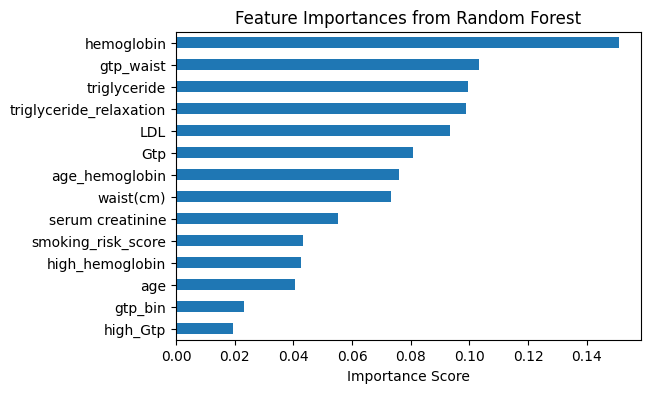

In [5]:
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv('newdataframe.csv')
X = df.drop(columns=['smoking'])
y = df['smoking']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(6, 4))
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.show()

Some additonal multivariate plots 

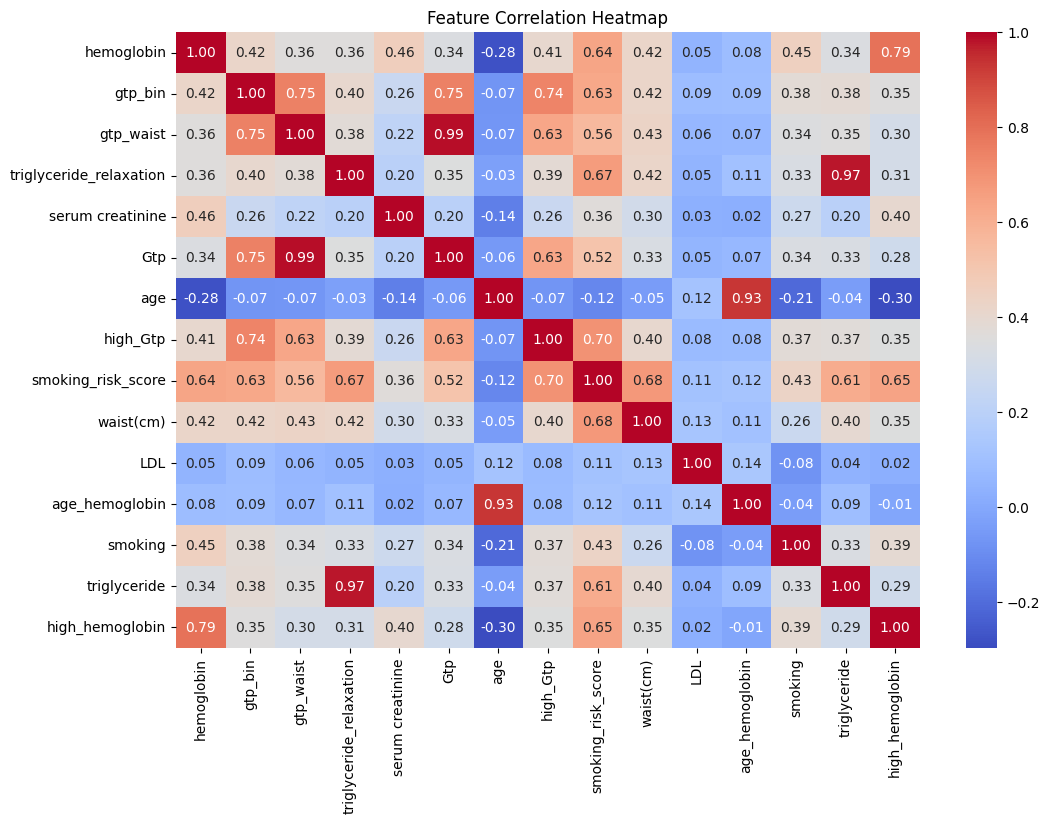

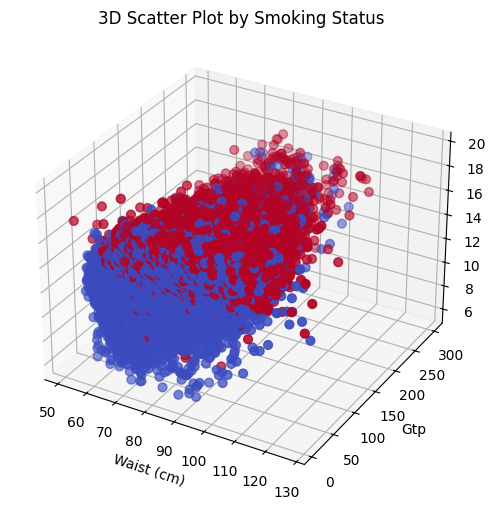

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.2})

#sns.pairplot(df[['hemoglobin', 'Gtp', 'LDL', 'waist(cm)', 'age', 'smoking']], hue='smoking')
#plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = df['waist(cm)']
y = df['Gtp']
z = df['hemoglobin']
c = df['smoking']

scatter = ax.scatter(x, y, z, c=c, cmap='coolwarm', s=40)
ax.set_xlabel('Waist (cm)')
ax.set_ylabel('Gtp')
ax.set_zlabel('Hemoglobin')
plt.title('3D Scatter Plot by Smoking Status')
plt.show()






